In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import wrangle_zillow as w

# Explore Zillow

In [2]:
df = w.get_zillow()

/Users/click/codeup-data-science/clustering-exercises/wrangle_zillow.py:21: DtypeWarning: Columns (65) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filename)


In [3]:
df.head()

,parcelid,typeconstructiontypeid,storytypeid,heatingorsystemtypeid,buildingclasstypeid,architecturalstyletypeid,airconditioningtypeid,propertylandusetypeid,id,basementsqft,...,propertylandusedesc,id.1,logerror,transactiondate,airconditioningdesc,architecturalstyledesc,buildingclassdesc,heatingorsystemdesc,storydesc,typeconstructiondesc
0,14297519,NaN,NaN,NaN,NaN,NaN,NaN,261.0,1727539,NaN,...,Single Family Residential,0,0.025595,2017-01-01,NaN,NaN,NaN,NaN,NaN,NaN
1,17052889,NaN,NaN,NaN,NaN,NaN,NaN,261.0,1387261,NaN,...,Single Family Residential,1,0.055619,2017-01-01,NaN,NaN,NaN,NaN,NaN,NaN
2,14186244,NaN,NaN,NaN,NaN,NaN,NaN,261.0,11677,NaN,...,Single Family Residential,2,0.005383,2017-01-01,NaN,NaN,NaN,NaN,NaN,NaN
3,12177905,NaN,NaN,2.0,NaN,NaN,NaN,261.0,2288172,NaN,...,Single Family Residential,3,-0.103410,2017-01-01,NaN,NaN,NaN,Central,NaN,NaN
4,10887214,NaN,NaN,2.0,NaN,NaN,1.0,266.0,1970746,NaN,...,Condominium,4,0.006940,2017-01-01,Central,NaN,NaN,Central,NaN,NaN


In [4]:
df = w.null_dropper(df, .75,.75)

In [5]:
w.check_columns(df)

,Column Name,Number of Unique Values,Unique Values,Number of Null Values,Proportion of Null Values,dtype
22,assessmentyear,1,[2016.0],0,0.000000,float64
16,regionidcounty,3,"[1286.0, 2061.0, 3101.0]",0,0.000000,float64
8,fips,3,"[6059.0, 6111.0, 6037.0]",0,0.000000,float64
9,fullbathcnt,13,"[3.0, 1.0, 2.0, nan, 4.0, 5.0, 6.0, 7.0, 9.0, ...",611,0.007876,float64
1,propertylandusetypeid,13,"[261.0, 266.0, 246.0, 260.0, 269.0, 247.0, 248...",0,0.000000,float64
26,propertylandusedesc,13,"[Single Family Residential, Condominium, Duple...",0,0.000000,object
18,roomcnt,16,"[0.0, 5.0, 6.0, 8.0, 7.0, 11.0, 3.0, 4.0, 9.0,...",0,0.000000,float64
4,bedroomcnt,16,"[4.0, 2.0, 3.0, 0.0, 6.0, 5.0, 1.0, 7.0, 8.0, ...",0,0.000000,float64
5,calculatedbathnbr,21,"[3.5, 1.0, 2.0, 3.0, nan, 2.5, 4.5, 4.0, 5.0, ...",611,0.007876,float64
3,bathroomcnt,22,"[3.5, 1.0, 2.0, 3.0, 0.0, 2.5, 4.5, 4.0, 5.0, ...",0,0.000000,float64


In [6]:
df.shape

(77575, 30)

In [7]:
pd.set_option('display.max_row', None)
pd.set_option('display.max_column', None)

In [8]:
df.head()

,parcelid,propertylandusetypeid,id,bathroomcnt,bedroomcnt,calculatedbathnbr,calculatedfinishedsquarefeet,finishedsquarefeet12,fips,fullbathcnt,latitude,longitude,lotsizesquarefeet,propertycountylandusecode,rawcensustractandblock,regionidcity,regionidcounty,regionidzip,roomcnt,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,censustractandblock,propertylandusedesc,id.1,logerror,transactiondate
0,14297519,261.0,1727539,3.5,4.0,3.5,3100.0,3100.0,6059.0,3.0,33634931.0,-117869207.0,4506.0,122,6.059063e+07,53571.0,1286.0,96978.0,0.0,1998.0,485713.0,1023282.0,2016.0,537569.0,11013.72,6.059063e+13,Single Family Residential,0,0.025595,2017-01-01
1,17052889,261.0,1387261,1.0,2.0,1.0,1465.0,1465.0,6111.0,1.0,34449266.0,-119281531.0,12647.0,1110,6.111001e+07,13091.0,2061.0,97099.0,5.0,1967.0,88000.0,464000.0,2016.0,376000.0,5672.48,6.111001e+13,Single Family Residential,1,0.055619,2017-01-01
2,14186244,261.0,11677,2.0,3.0,2.0,1243.0,1243.0,6059.0,2.0,33886168.0,-117823170.0,8432.0,122,6.059022e+07,21412.0,1286.0,97078.0,6.0,1962.0,85289.0,564778.0,2016.0,479489.0,6488.30,6.059022e+13,Single Family Residential,2,0.005383,2017-01-01
3,12177905,261.0,2288172,3.0,4.0,3.0,2376.0,2376.0,6037.0,3.0,34245180.0,-118240722.0,13038.0,0101,6.037300e+07,396551.0,3101.0,96330.0,0.0,1970.0,108918.0,145143.0,2016.0,36225.0,1777.51,6.037300e+13,Single Family Residential,3,-0.103410,2017-01-01
4,10887214,266.0,1970746,3.0,3.0,3.0,1312.0,1312.0,6037.0,3.0,34185120.0,-118414640.0,278581.0,010C,6.037124e+07,12447.0,3101.0,96451.0,0.0,1964.0,73681.0,119407.0,2016.0,45726.0,1533.89,6.037124e+13,Condominium,4,0.006940,2017-01-01


In [9]:
df = df[(df['propertylandusetypeid'] == 261)]

In [10]:
df.shape

(52440, 30)

In [11]:
w.check_columns(df)

,Column Name,Number of Unique Values,Unique Values,Number of Null Values,Proportion of Null Values,dtype
1,propertylandusetypeid,1,[261.0],0,0.000000,float64
26,propertylandusedesc,1,[Single Family Residential],0,0.000000,object
22,assessmentyear,1,[2016.0],0,0.000000,float64
16,regionidcounty,3,"[1286.0, 2061.0, 3101.0]",0,0.000000,float64
8,fips,3,"[6059.0, 6111.0, 6037.0]",0,0.000000,float64
9,fullbathcnt,13,"[3.0, 1.0, 2.0, 4.0, 5.0, 6.0, nan, 9.0, 8.0, ...",135,0.002574,float64
4,bedroomcnt,14,"[4.0, 2.0, 3.0, 6.0, 5.0, 1.0, 7.0, 0.0, 8.0, ...",0,0.000000,float64
18,roomcnt,16,"[0.0, 5.0, 6.0, 8.0, 7.0, 11.0, 9.0, 4.0, 10.0...",0,0.000000,float64
5,calculatedbathnbr,21,"[3.5, 1.0, 2.0, 3.0, 2.5, 4.5, 4.0, 5.0, 6.5, ...",135,0.002574,float64
3,bathroomcnt,22,"[3.5, 1.0, 2.0, 3.0, 2.5, 4.5, 4.0, 5.0, 6.5, ...",0,0.000000,float64


In [12]:
# all values are 261 for prop id, 2016 for assessmentyr, 2017 in transaction, and have calcfinished sq ft, don't need finishedsqft
drop_list = ['propertylandusetypeid', 'assessmentyear','transactiondate', 'finishedsquarefeet12', 'calculatedbathnbr', 'fullbathcnt', 'roomcnt']
df = df.drop(columns=drop_list)

In [13]:
df.shape

(52440, 23)

In [14]:
# Update column names
df.rename(columns={'fips': 'county', 'bedroomcnt': 'bedrooms', 'bathroomcnt': 'bathrooms', 'calculatedfinishedsquarefeet': 'finished_area', 'lotsizesquarefeet': 'lot_area', 'taxvaluedollarcnt': 'home_value'}, inplace=True)

In [15]:
df.head()

,parcelid,id,bathrooms,bedrooms,finished_area,county,latitude,longitude,lot_area,propertycountylandusecode,rawcensustractandblock,regionidcity,regionidcounty,regionidzip,yearbuilt,structuretaxvaluedollarcnt,home_value,landtaxvaluedollarcnt,taxamount,censustractandblock,propertylandusedesc,id.1,logerror
0,14297519,1727539,3.5,4.0,3100.0,6059.0,33634931.0,-117869207.0,4506.0,122,6.059063e+07,53571.0,1286.0,96978.0,1998.0,485713.0,1023282.0,537569.0,11013.72,6.059063e+13,Single Family Residential,0,0.025595
1,17052889,1387261,1.0,2.0,1465.0,6111.0,34449266.0,-119281531.0,12647.0,1110,6.111001e+07,13091.0,2061.0,97099.0,1967.0,88000.0,464000.0,376000.0,5672.48,6.111001e+13,Single Family Residential,1,0.055619
2,14186244,11677,2.0,3.0,1243.0,6059.0,33886168.0,-117823170.0,8432.0,122,6.059022e+07,21412.0,1286.0,97078.0,1962.0,85289.0,564778.0,479489.0,6488.30,6.059022e+13,Single Family Residential,2,0.005383
3,12177905,2288172,3.0,4.0,2376.0,6037.0,34245180.0,-118240722.0,13038.0,0101,6.037300e+07,396551.0,3101.0,96330.0,1970.0,108918.0,145143.0,36225.0,1777.51,6.037300e+13,Single Family Residential,3,-0.103410
6,12095076,781532,3.0,4.0,2962.0,6037.0,34145202.0,-118179824.0,63000.0,0101,6.037461e+07,47019.0,3101.0,96293.0,1950.0,276684.0,773303.0,496619.0,9516.26,6.037461e+13,Single Family Residential,6,-0.001011


In [16]:
w.check_columns(df[['regionidcity', 'regionidzip', 'county', 'regionidcounty']])

,Column Name,Number of Unique Values,Unique Values,Number of Null Values,Proportion of Null Values,dtype
2,county,3,"[6059.0, 6111.0, 6037.0]",0,0.000000,float64
3,regionidcounty,3,"[1286.0, 2061.0, 3101.0]",0,0.000000,float64
0,regionidcity,175,"[53571.0, 13091.0, 21412.0, 396551.0, 47019.0,...",1035,0.019737,float64
1,regionidzip,381,"[96978.0, 97099.0, 97078.0, 96330.0, 96293.0, ...",24,0.000458,float64


In [17]:
df.county = df.county.map({6037: 'LA', 6059: 'Orange', 6111: 'Ventura'})

In [18]:
df['regionidcity'].dropna(inplace=True)

In [19]:
df['regionidzip'].dropna(inplace=True)

In [20]:
w.check_columns(df[['regionidcity', 'regionidzip', 'county', 'regionidcounty']])

,Column Name,Number of Unique Values,Unique Values,Number of Null Values,Proportion of Null Values,dtype
2,county,3,"[Orange, Ventura, LA]",0,0.000000,object
3,regionidcounty,3,"[1286.0, 2061.0, 3101.0]",0,0.000000,float64
0,regionidcity,175,"[53571.0, 13091.0, 21412.0, 396551.0, 47019.0,...",1035,0.019737,float64
1,regionidzip,381,"[96978.0, 97099.0, 97078.0, 96330.0, 96293.0, ...",24,0.000458,float64


In [21]:
w.check_columns(df)

,Column Name,Number of Unique Values,Unique Values,Number of Null Values,Proportion of Null Values,dtype
20,propertylandusedesc,1,[Single Family Residential],0,0.000000,object
5,county,3,"[Orange, Ventura, LA]",0,0.000000,object
12,regionidcounty,3,"[1286.0, 2061.0, 3101.0]",0,0.000000,float64
3,bedrooms,14,"[4.0, 2.0, 3.0, 6.0, 5.0, 1.0, 7.0, 0.0, 8.0, ...",0,0.000000,float64
2,bathrooms,22,"[3.5, 1.0, 2.0, 3.0, 2.5, 4.5, 4.0, 5.0, 6.5, ...",0,0.000000,float64
9,propertycountylandusecode,26,"[122, 1110, 0101, 0100, 1111, 0103, 1, 0104, 0...",0,0.000000,object
14,yearbuilt,133,"[1998.0, 1967.0, 1962.0, 1970.0, 1950.0, 1922....",114,0.002174,float64
11,regionidcity,175,"[53571.0, 13091.0, 21412.0, 396551.0, 47019.0,...",1035,0.019737,float64
13,regionidzip,381,"[96978.0, 97099.0, 97078.0, 96330.0, 96293.0, ...",24,0.000458,float64
4,finished_area,4723,"[3100.0, 1465.0, 1243.0, 2376.0, 2962.0, 738.0...",80,0.001526,float64


In [22]:
df.dropna(axis=0, inplace=True)

In [23]:
w.check_columns(df)

,Column Name,Number of Unique Values,Unique Values,Number of Null Values,Proportion of Null Values,dtype
20,propertylandusedesc,1,[Single Family Residential],0,0.0,object
5,county,3,"[Orange, Ventura, LA]",0,0.0,object
12,regionidcounty,3,"[1286.0, 2061.0, 3101.0]",0,0.0,float64
3,bedrooms,12,"[4.0, 2.0, 3.0, 6.0, 5.0, 1.0, 7.0, 8.0, 0.0, ...",0,0.0,float64
2,bathrooms,21,"[3.5, 1.0, 2.0, 3.0, 2.5, 4.5, 4.0, 5.0, 6.5, ...",0,0.0,float64
9,propertycountylandusecode,22,"[122, 1110, 0101, 0100, 1111, 0103, 1, 0104, 0...",0,0.0,object
14,yearbuilt,133,"[1998.0, 1967.0, 1962.0, 1970.0, 1950.0, 1922....",0,0.0,float64
11,regionidcity,175,"[53571.0, 13091.0, 21412.0, 396551.0, 47019.0,...",0,0.0,float64
13,regionidzip,378,"[96978.0, 97099.0, 97078.0, 96330.0, 96293.0, ...",0,0.0,float64
4,finished_area,4663,"[3100.0, 1465.0, 1243.0, 2376.0, 2962.0, 738.0...",0,0.0,float64


In [24]:
df.shape

(50868, 23)

In [25]:
# Cleaned up , Need split
train, validate, test = w.split_data(df)

Train: 0.5599787685774947
Validate: 0.24001336793268851
Test: 0.20000786348981678


In [26]:
# separating our numeric and categorical columns:
# initialize two empty lists for each type:
cat_cols, num_cols = [], []
# set up a for loop to build those lists out:
# so for every column in explore_columns:
for col in train:
    # check to see if its an object type,
    # if so toss it in categorical
    if df[col].dtype == 'O':
        cat_cols.append(col)
    # otherwise if its numeric:
    else:
        # check to see if we have more than just a few values:
        # if thats the case, toss it in categorical
        if df[col].nunique() < 400:
            cat_cols.append(col)
        # and otherwise call it continuous by elimination
        else:
            num_cols.append(col)

In [27]:
num_cols

['parcelid',
 'id',
 'finished_area',
 'latitude',
 'longitude',
 'lot_area',
 'rawcensustractandblock',
 'structuretaxvaluedollarcnt',
 'home_value',
 'landtaxvaluedollarcnt',
 'taxamount',
 'censustractandblock',
 'id.1',
 'logerror']

In [28]:
df[num_cols].head()

,parcelid,id,finished_area,latitude,longitude,lot_area,rawcensustractandblock,structuretaxvaluedollarcnt,home_value,landtaxvaluedollarcnt,taxamount,censustractandblock,id.1,logerror
0,14297519,1727539,3100.0,33634931.0,-117869207.0,4506.0,6.059063e+07,485713.0,1023282.0,537569.0,11013.72,6.059063e+13,0,0.025595
1,17052889,1387261,1465.0,34449266.0,-119281531.0,12647.0,6.111001e+07,88000.0,464000.0,376000.0,5672.48,6.111001e+13,1,0.055619
2,14186244,11677,1243.0,33886168.0,-117823170.0,8432.0,6.059022e+07,85289.0,564778.0,479489.0,6488.30,6.059022e+13,2,0.005383
3,12177905,2288172,2376.0,34245180.0,-118240722.0,13038.0,6.037300e+07,108918.0,145143.0,36225.0,1777.51,6.037300e+13,3,-0.103410
6,12095076,781532,2962.0,34145202.0,-118179824.0,63000.0,6.037461e+07,276684.0,773303.0,496619.0,9516.26,6.037461e+13,6,-0.001011


In [29]:
location_feats = ['latitude','longitude', 'rawcensustractandblock', 'censustractandblock']
continuous_df = df[num_cols].drop(columns=location_feats)

In [30]:
cat_cols

['bathrooms',
 'bedrooms',
 'county',
 'propertycountylandusecode',
 'regionidcity',
 'regionidcounty',
 'regionidzip',
 'yearbuilt',
 'propertylandusedesc']

### 1. Ask at least 5 questions about the data, keeping in mind that your target variable is logerror. e.g. Is logerror significantly different for properties in LA County vs Orange County vs Ventura County?

### 2. Answer those questions through a mix of statistical tests and visualizations.



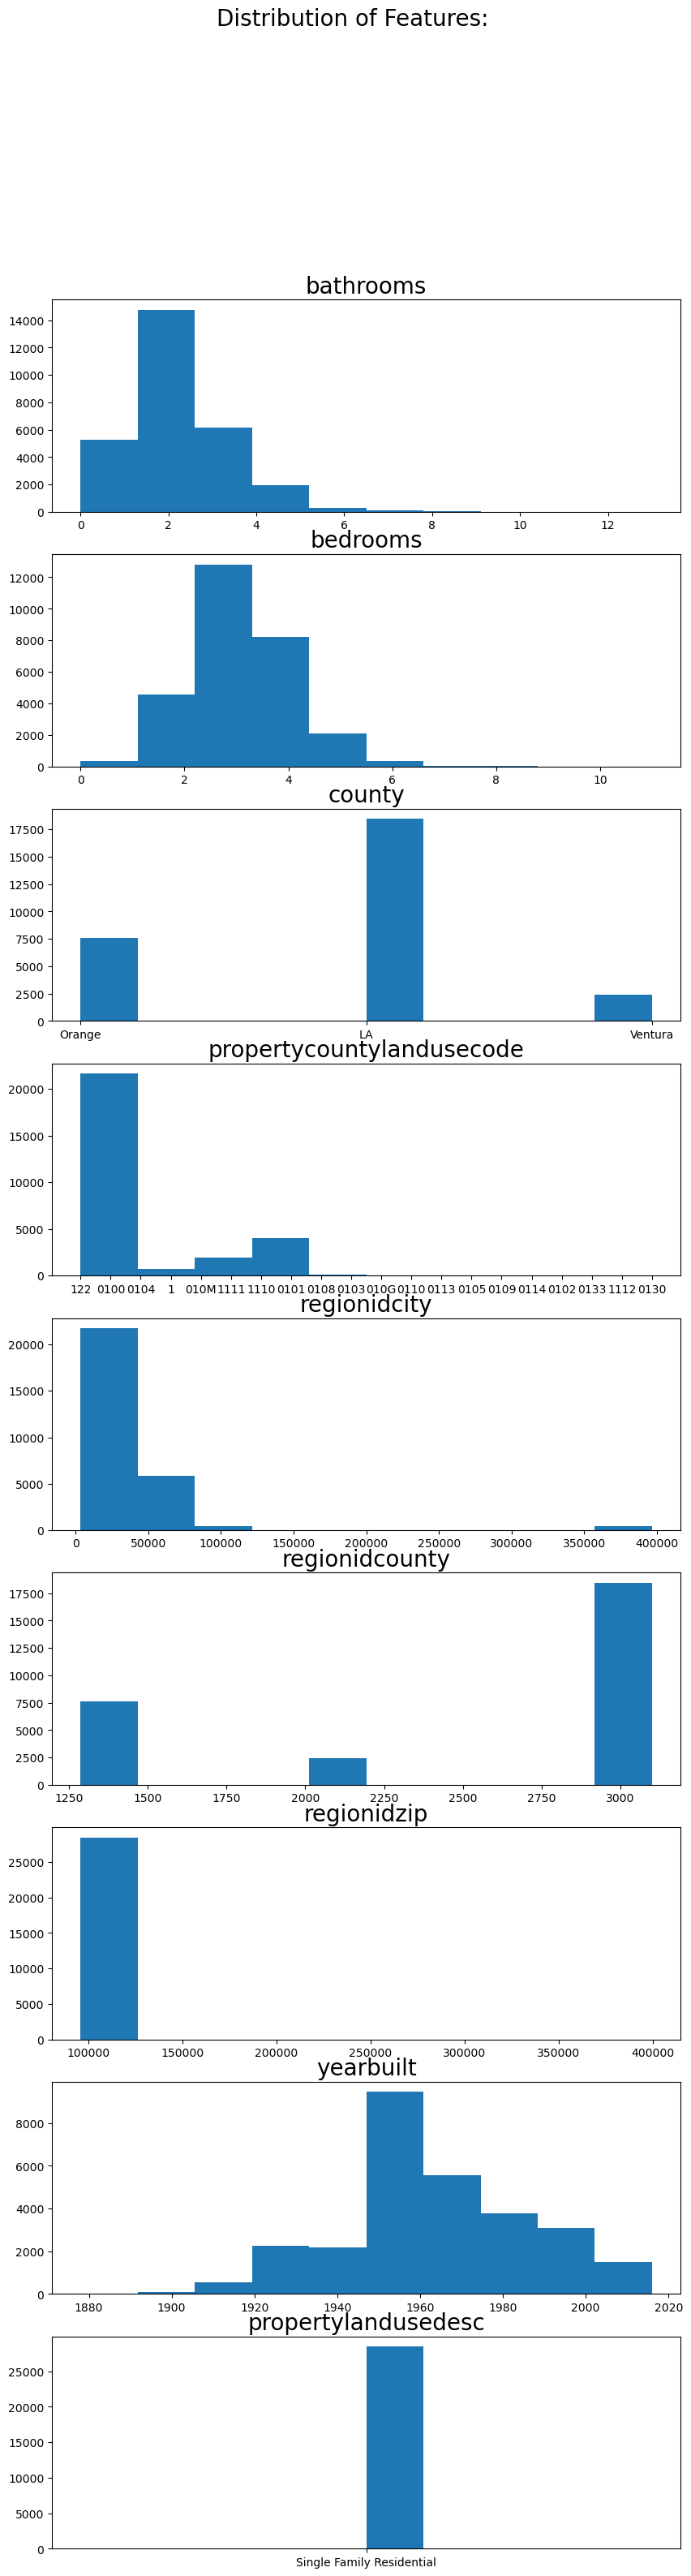

In [31]:
# Hows the distribution
fig, axs = plt.subplots(9,1, figsize=(10,36))
fig.suptitle('Distribution of Features: ', fontsize=20)
for col, ax in zip(cat_cols, axs):
    # make the histogram
    ax.hist(train[col])
    # set the title for that plot
    ax.set_title(label=f'{col}', fontsize=20)
plt.show()
    

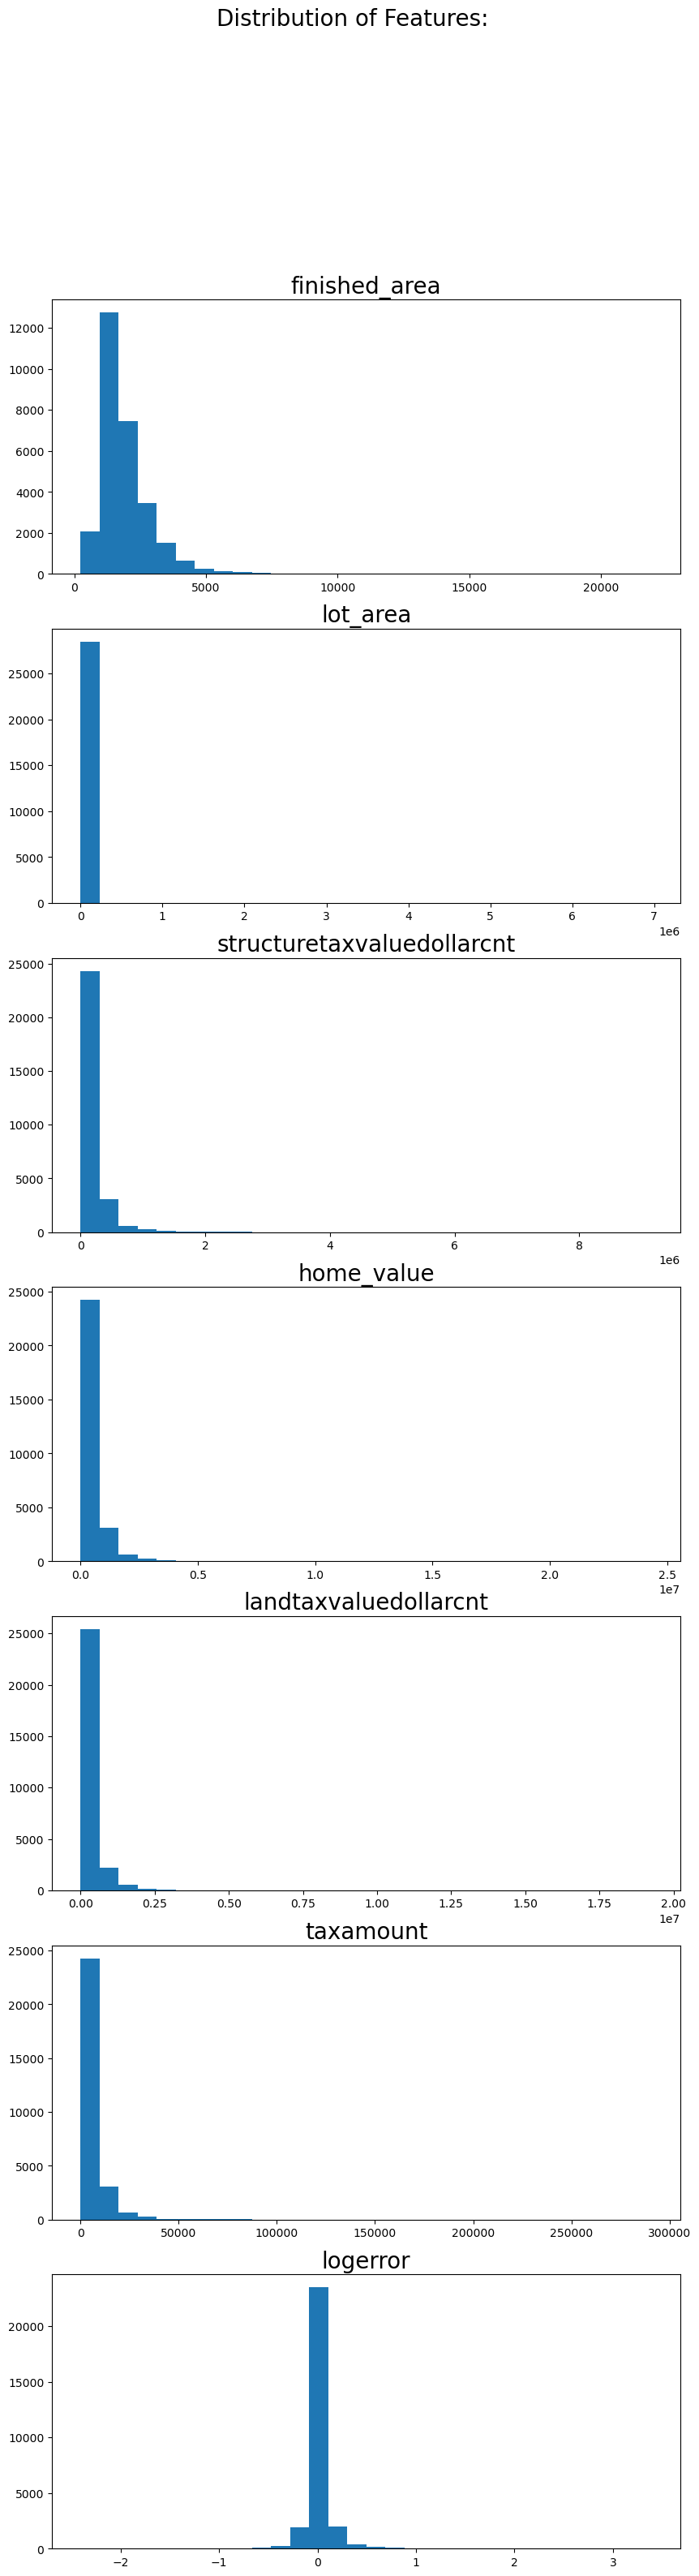

In [32]:
# Hows the distribution
fig, axs = plt.subplots(7,1, figsize=(10,36))
fig.suptitle('Distribution of Features: ', fontsize=20)
for col, ax in zip(continuous_df.drop(columns=['id', 'parcelid', 'id.1']), axs):
    # make the histogram
    ax.hist(train[col], bins=30)
    # set the title for that plot
    ax.set_title(label=f'{col}', fontsize=20)
plt.show()

In [33]:
train.head()

,parcelid,id,bathrooms,bedrooms,finished_area,county,latitude,longitude,lot_area,propertycountylandusecode,rawcensustractandblock,regionidcity,regionidcounty,regionidzip,yearbuilt,structuretaxvaluedollarcnt,home_value,landtaxvaluedollarcnt,taxamount,censustractandblock,propertylandusedesc,id.1,logerror
62844,13949730,144961,1.5,3.0,2232.0,Orange,33756960.0,-117960714.0,10908.0,122,6.059089e+07,24832.0,1286.0,97051.0,1957.0,171650.0,544000.0,372350.0,6561.14,6.059089e+13,Single Family Residential,62844,-0.027312
7578,12004671,482974,1.0,1.0,826.0,LA,34092336.0,-118315008.0,2499.0,0100,6.037191e+07,12447.0,3101.0,96019.0,1917.0,125826.0,629145.0,503319.0,7537.39,6.037191e+13,Single Family Residential,7578,0.026240
57221,12660081,1887703,4.0,5.0,1760.0,LA,33849419.0,-118376469.0,2898.0,0100,6.037621e+07,54722.0,3101.0,96123.0,1965.0,99295.0,396782.0,297487.0,5057.88,6.037621e+13,Single Family Residential,57221,0.026030
75266,12528063,1812976,3.0,5.0,3050.0,LA,33757144.0,-118127336.0,3178.0,0104,6.037578e+07,46298.0,3101.0,96237.0,1926.0,210160.0,361980.0,151820.0,4428.75,6.037578e+13,Single Family Residential,75266,0.030568
71542,14506209,1758106,3.0,4.0,1996.0,Orange,33659764.0,-117614108.0,5200.0,122,6.059032e+07,15554.0,1286.0,96993.0,1994.0,257100.0,687000.0,429900.0,10134.42,6.059032e+13,Single Family Residential,71542,-0.013971


### What relationship is there to home value, regionzipcodes, and logerror have with county?

In [34]:
explore_cols = df[['home_value', "regionidzip", 'logerror']]

In [35]:
# # looking at gender as a split along the continuous features:
# fig, axs = plt.subplots(3,3, figsize=(20,10), sharex=True)
# fig.suptitle('Comparison of County', fontsize=20)
# for ax, col in zip(axs[0], explore_cols.sample(10000)):
#     sns.swarmplot(data=train, x='county',y=col, ax=ax)
#     ax.set_xlabel(None)
# for ax, col in zip(axs[1], explore_cols):
#     sns.violinplot(data=train, x='county',y=col, ax=ax)
#     ax.set_xlabel(None)
# for ax, col in zip(axs[2], explore_cols):
#     sns.boxplot(data=train, x='county',y=col, ax=ax)
# plt.show()

<Axes: xlabel='county', ylabel='logerror'>

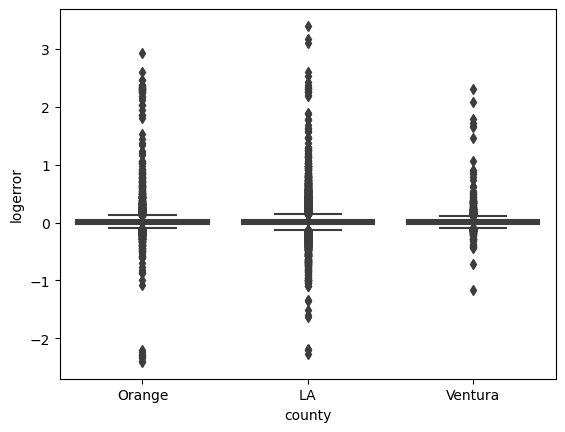

In [36]:
sns.boxplot(data=train, x='county', y='logerror')

<Axes: xlabel='county', ylabel='logerror'>

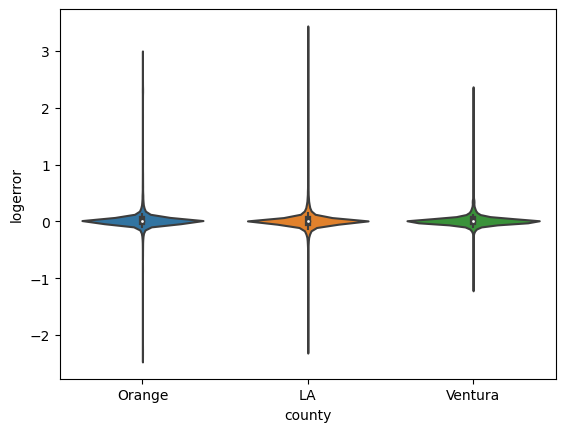

In [37]:
sns.violinplot(data=train, x='county', y='logerror')

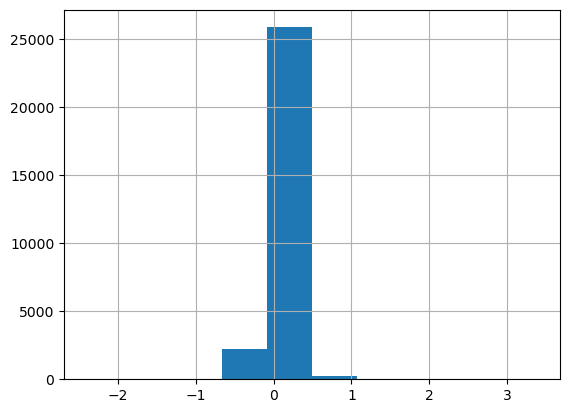

In [38]:
train.logerror.hist()
plt.show()

<Axes: xlabel='home_value', ylabel='logerror'>

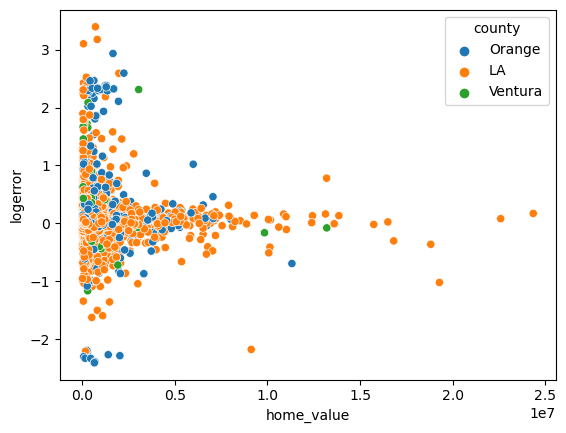

In [39]:
sns.scatterplot(data=train, x='home_value', y='logerror', hue='county')

<Axes: xlabel='yearbuilt', ylabel='logerror'>

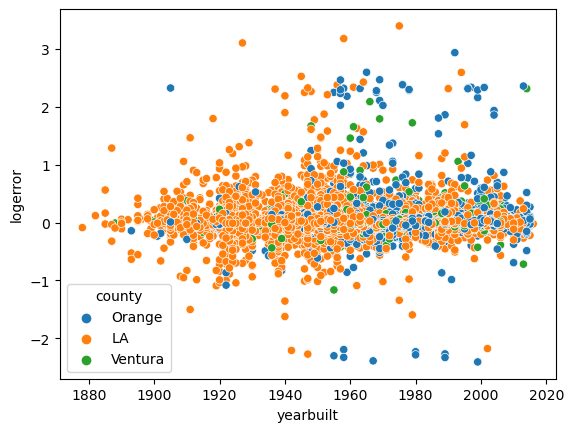

In [40]:
sns.scatterplot(data=train, x='yearbuilt', y='logerror', hue='county')

<Axes: xlabel='yearbuilt', ylabel='logerror'>

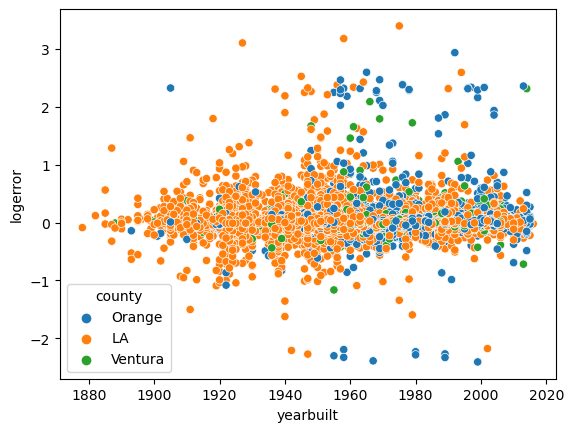

In [41]:
sns.scatterplot(data=train, x='yearbuilt', y='logerror', hue='county')

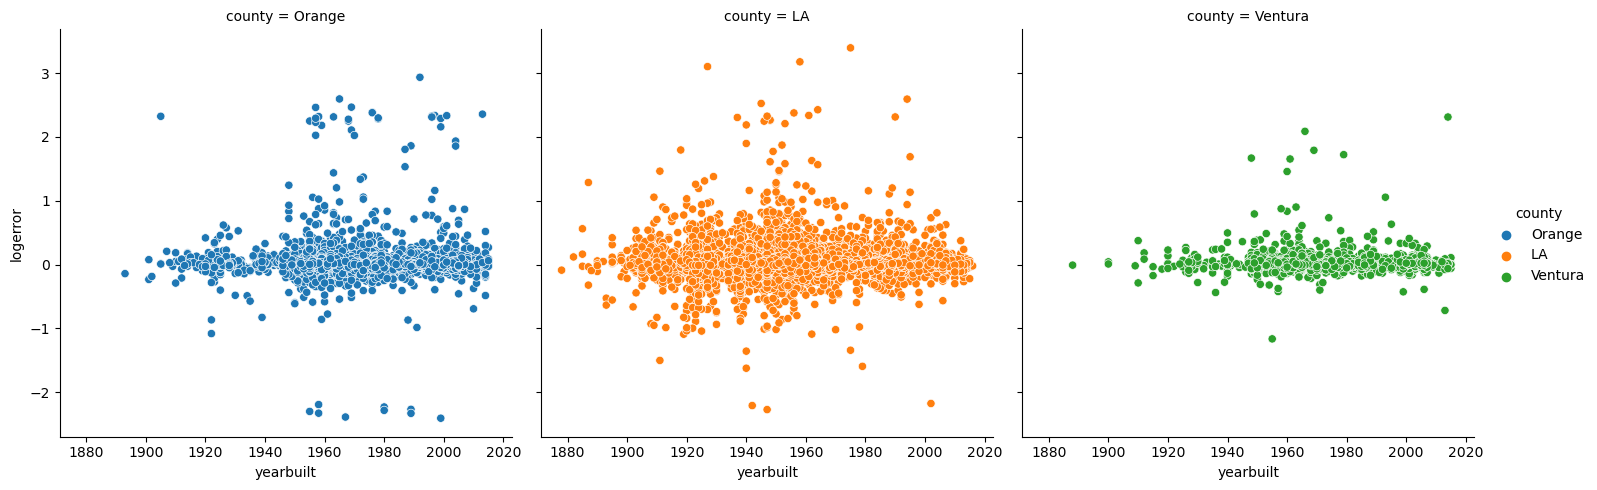

In [42]:
sns.relplot(data=train, x='yearbuilt', y='logerror', col='county', hue='county')

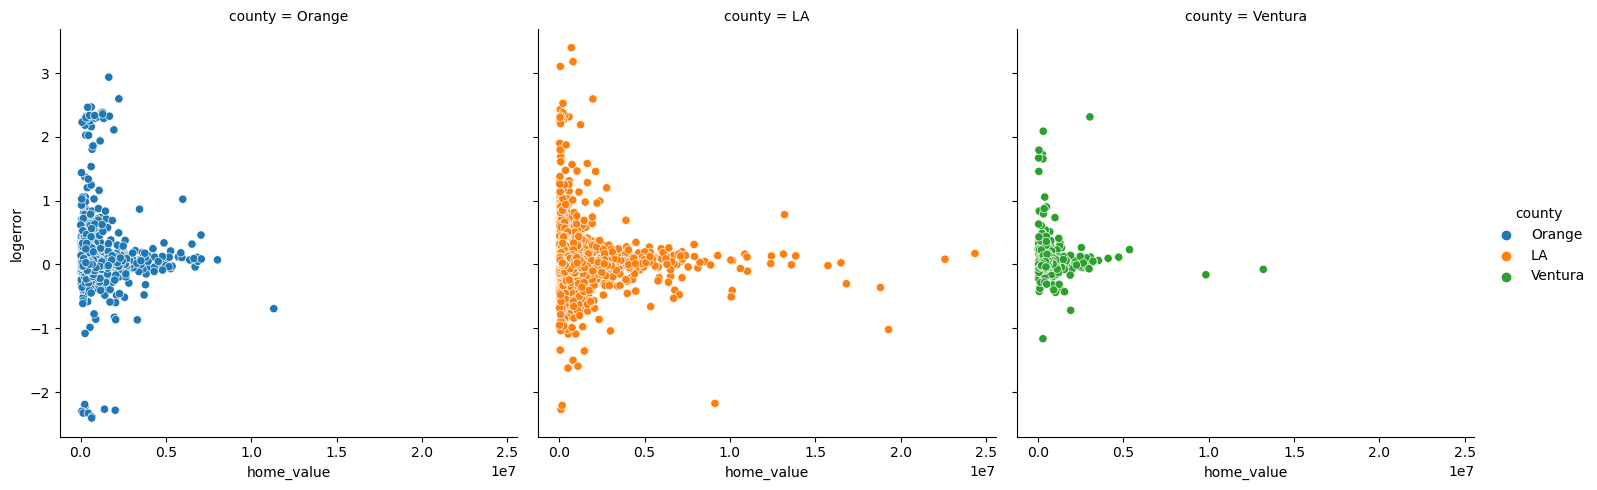

In [43]:
sns.relplot(data=train, x='home_value', y='logerror', col='county', hue='county')

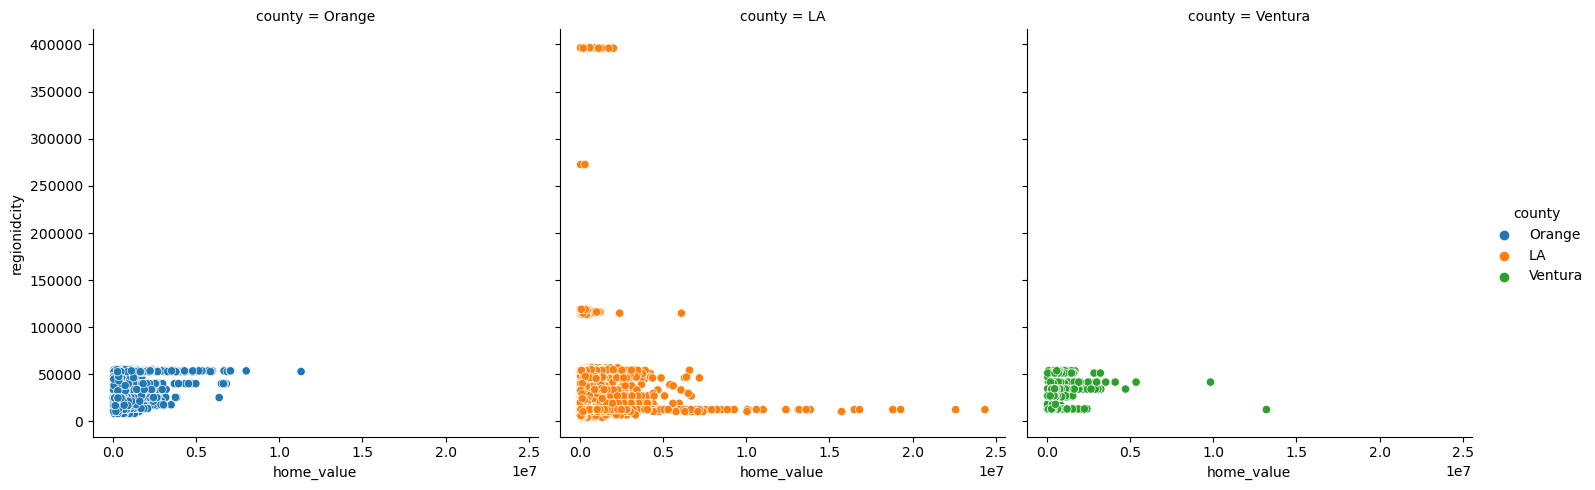

In [44]:
sns.relplot(data=train, x='home_value', y='regionidcity', col='county', hue='county')

Is logerror diff for home values in each county?

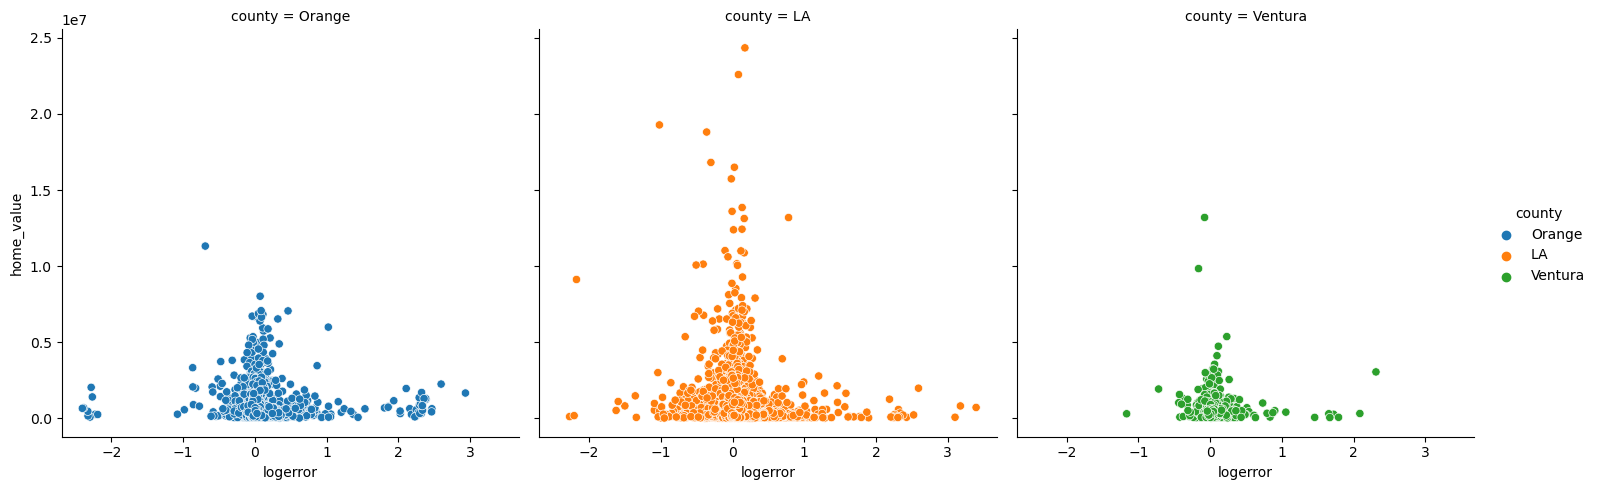

In [45]:
sns.relplot(data=train, x='logerror', y='home_value', col='county', hue='county')

What does all this look like with lat / long?

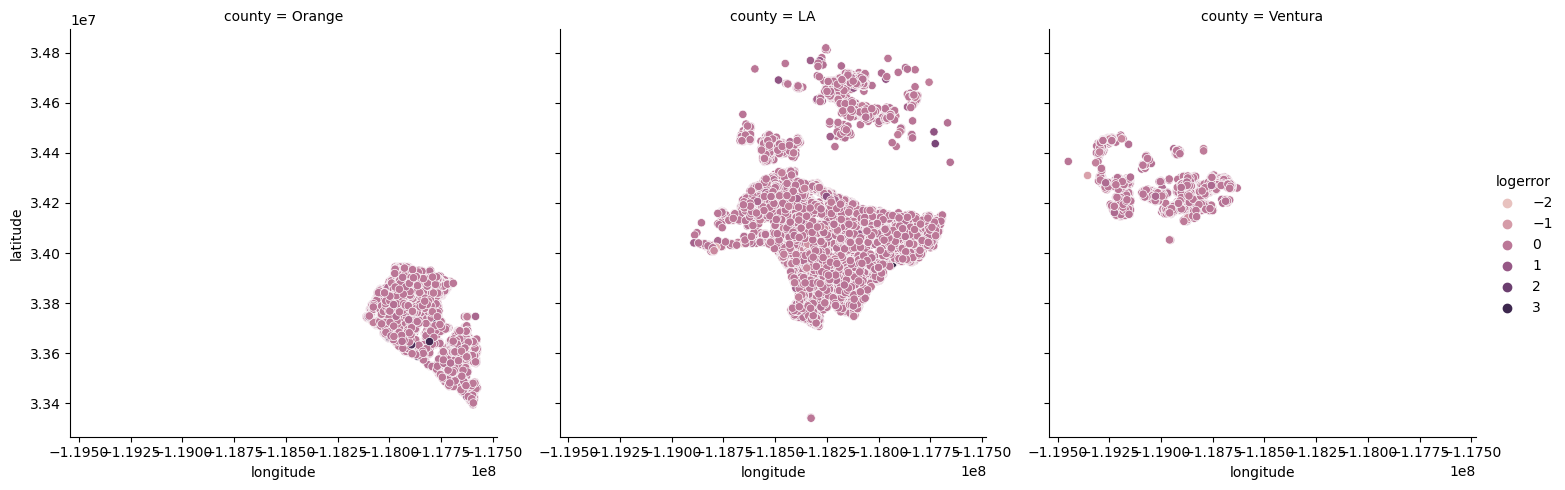

In [46]:
sns.relplot(data=train, x='longitude', y='latitude', hue='logerror', col='county')

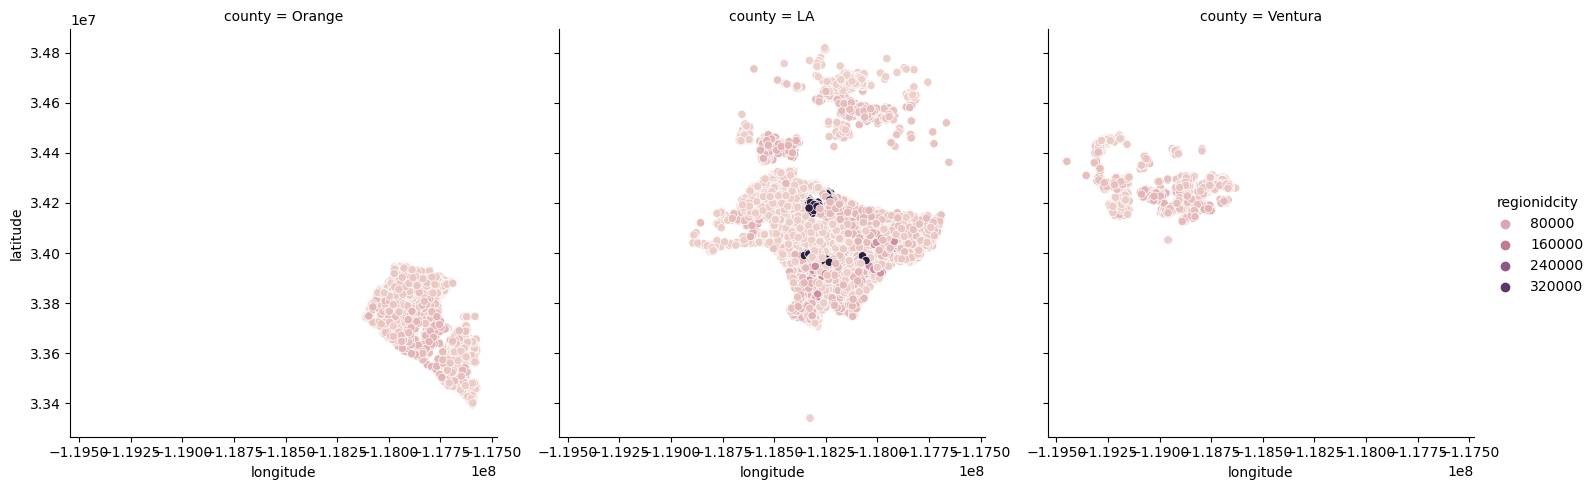

In [47]:
sns.relplot(data=train, x='longitude', y='latitude', hue='regionidcity', col='county')

<Figure size 4000x2000 with 0 Axes>

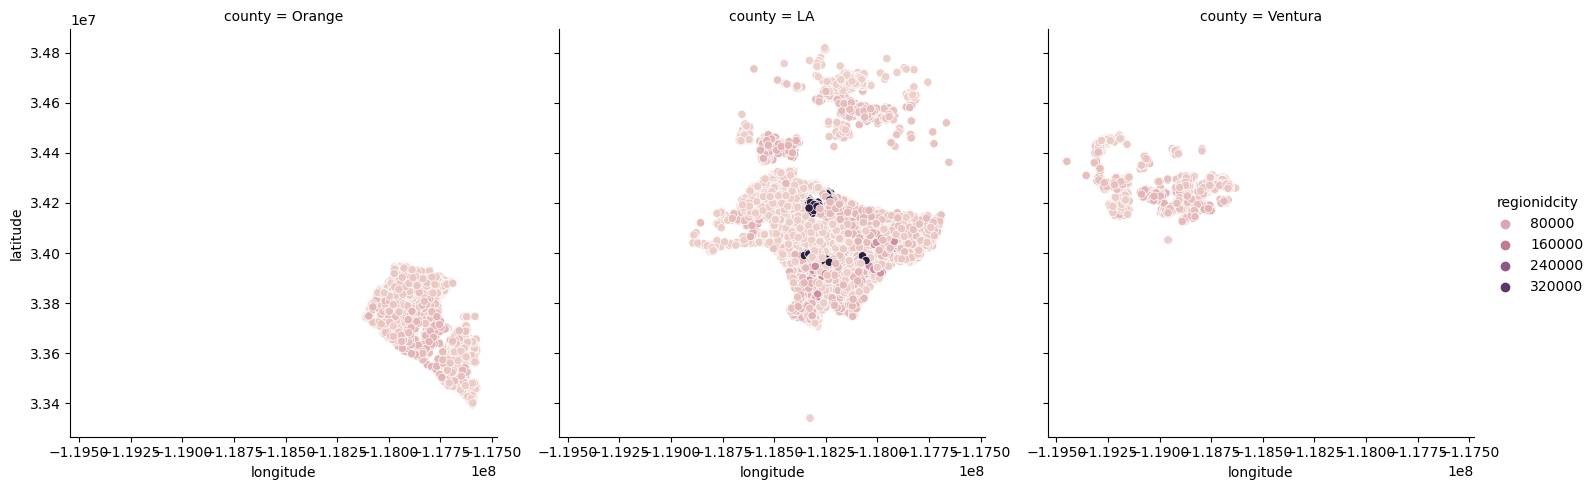

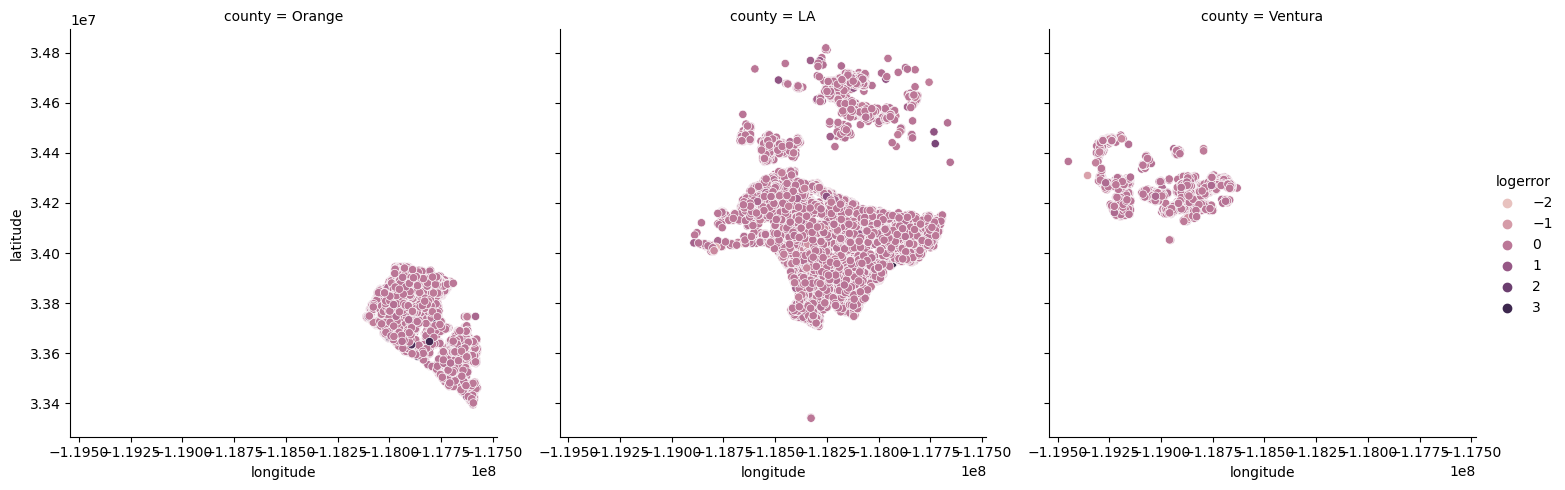

In [48]:
plt.figure(figsize=(40,20))
sns.relplot(data=train, x='longitude', y='latitude', hue='regionidcity', col='county')
sns.relplot(data=train, x='longitude', y='latitude', hue='logerror', col='county')
plt.show()

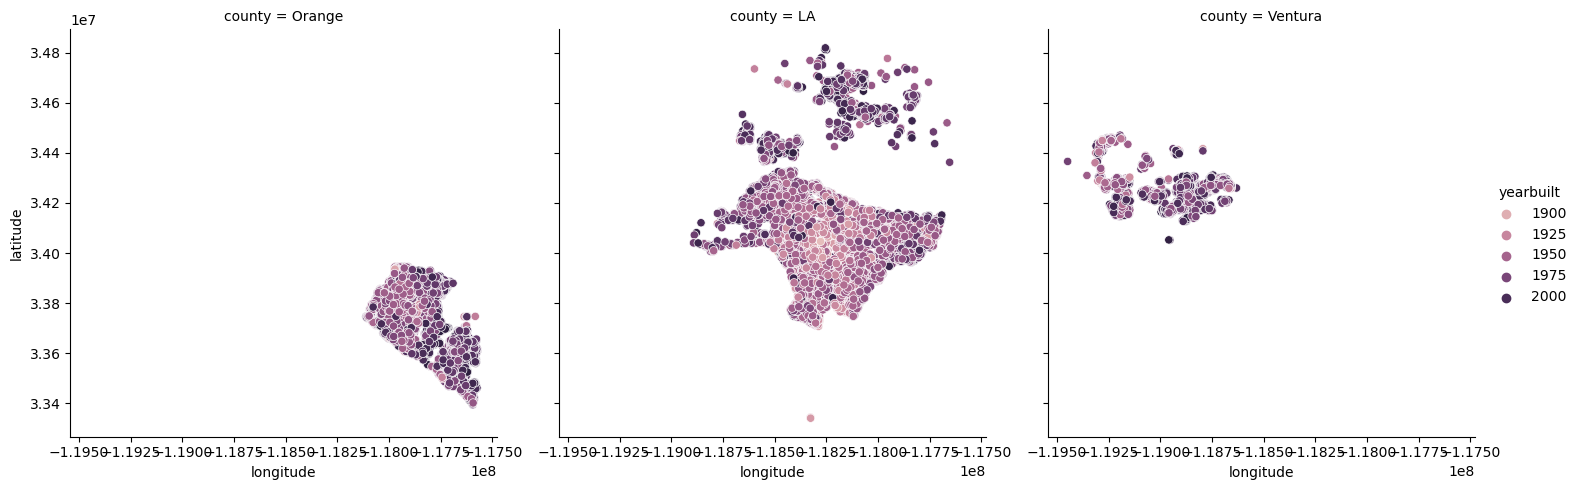

In [49]:
sns.relplot(data=train, x='longitude', y='latitude', hue='yearbuilt', col='county')
plt.show()

What if I split the home_values into categories i.e. 0-200k, etc?

In [50]:
train.home_value.describe()

count    2.848500e+04
mean     5.240656e+05
std      7.223957e+05
min      3.254000e+03
25%      1.914020e+05
50%      3.698040e+05
75%      6.126960e+05
max      2.434570e+07
Name: home_value, dtype: float64

In [51]:
train['value_range'] = pd.cut(train.home_value, [0,500000,1000000,1500000,2000000, 3000000, 4000000])

In [87]:
train.head()

,parcelid,id,bathrooms,bedrooms,finished_area,county,latitude,longitude,lot_area,propertycountylandusecode,rawcensustractandblock,regionidcity,regionidcounty,regionidzip,yearbuilt,structuretaxvaluedollarcnt,home_value,landtaxvaluedollarcnt,taxamount,censustractandblock,propertylandusedesc,id.1,logerror,value_range
62844,13949730,144961,1.5,3.0,2232.0,Orange,33756960.0,-117960714.0,10908.0,122,6.059089e+07,24832.0,1286.0,97051.0,1957.0,171650.0,544000.0,372350.0,6561.14,6.059089e+13,Single Family Residential,62844,-0.027312,"(500000, 1000000]"
7578,12004671,482974,1.0,1.0,826.0,LA,34092336.0,-118315008.0,2499.0,0100,6.037191e+07,12447.0,3101.0,96019.0,1917.0,125826.0,629145.0,503319.0,7537.39,6.037191e+13,Single Family Residential,7578,0.026240,"(500000, 1000000]"
57221,12660081,1887703,4.0,5.0,1760.0,LA,33849419.0,-118376469.0,2898.0,0100,6.037621e+07,54722.0,3101.0,96123.0,1965.0,99295.0,396782.0,297487.0,5057.88,6.037621e+13,Single Family Residential,57221,0.026030,"(0, 500000]"
75266,12528063,1812976,3.0,5.0,3050.0,LA,33757144.0,-118127336.0,3178.0,0104,6.037578e+07,46298.0,3101.0,96237.0,1926.0,210160.0,361980.0,151820.0,4428.75,6.037578e+13,Single Family Residential,75266,0.030568,"(0, 500000]"
71542,14506209,1758106,3.0,4.0,1996.0,Orange,33659764.0,-117614108.0,5200.0,122,6.059032e+07,15554.0,1286.0,96993.0,1994.0,257100.0,687000.0,429900.0,10134.42,6.059032e+13,Single Family Residential,71542,-0.013971,"(500000, 1000000]"


What if I split into train into 3 dfs by county?

In [52]:
orange_df = train[(train['county'] == 'Orange')]

In [53]:
orange_df.head()

,parcelid,id,bathrooms,bedrooms,finished_area,county,latitude,longitude,lot_area,propertycountylandusecode,rawcensustractandblock,regionidcity,regionidcounty,regionidzip,yearbuilt,structuretaxvaluedollarcnt,home_value,landtaxvaluedollarcnt,taxamount,censustractandblock,propertylandusedesc,id.1,logerror,value_range
62844,13949730,144961,1.5,3.0,2232.0,Orange,33756960.0,-117960714.0,10908.0,122,6.059089e+07,24832.0,1286.0,97051.0,1957.0,171650.0,544000.0,372350.0,6561.14,6.059089e+13,Single Family Residential,62844,-0.027312,"(500000, 1000000]"
71542,14506209,1758106,3.0,4.0,1996.0,Orange,33659764.0,-117614108.0,5200.0,122,6.059032e+07,15554.0,1286.0,96993.0,1994.0,257100.0,687000.0,429900.0,10134.42,6.059032e+13,Single Family Residential,71542,-0.013971,"(500000, 1000000]"
17658,14433255,609149,3.0,3.0,2547.0,Orange,33485264.0,-117691709.0,5000.0,122,6.059042e+07,17686.0,1286.0,96961.0,1986.0,213449.0,936812.0,723363.0,10106.04,6.059042e+13,Single Family Residential,17658,0.003956,"(500000, 1000000]"
44660,14464948,2683038,2.5,4.0,2756.0,Orange,33558130.0,-117639890.0,7267.0,1,6.059032e+07,52835.0,1286.0,96998.0,2002.0,428359.0,772894.0,344535.0,12508.64,6.059032e+13,Single Family Residential,44660,-0.025617,"(500000, 1000000]"
52530,14305380,906923,2.5,3.0,1517.0,Orange,33685225.0,-117774525.0,2130.0,122,6.059053e+07,52650.0,1286.0,96941.0,1976.0,68709.0,102602.0,33893.0,1114.58,6.059053e+13,Single Family Residential,52530,0.043585,"(0, 500000]"


In [54]:
w.check_columns(orange_df)

,Column Name,Number of Unique Values,Unique Values,Number of Null Values,Proportion of Null Values,dtype
20,propertylandusedesc,1,[Single Family Residential],0,0.000000,object
12,regionidcounty,1,[1286.0],0,0.000000,float64
5,county,1,[Orange],0,0.000000,object
9,propertycountylandusecode,2,"[122, 1]",0,0.000000,object
23,value_range,6,"[(500000.0, 1000000.0], (0.0, 500000.0], (1500...",33,0.004334,category
3,bedrooms,9,"[3.0, 4.0, 5.0, 2.0, 1.0, 6.0, 7.0, 0.0, 8.0]",0,0.000000,float64
2,bathrooms,15,"[1.5, 3.0, 2.5, 2.0, 1.0, 4.5, 5.5, 4.0, 3.5, ...",0,0.000000,float64
11,regionidcity,39,"[24832.0, 15554.0, 17686.0, 52835.0, 52650.0, ...",0,0.000000,float64
13,regionidzip,85,"[97051.0, 96993.0, 96961.0, 96998.0, 96941.0, ...",0,0.000000,float64
14,yearbuilt,113,"[1957.0, 1994.0, 1986.0, 2002.0, 1976.0, 1965....",0,0.000000,float64


In [55]:
ventura_df = train[(train['county'] == 'Ventura')]
la_df = train[(train['county'] == 'LA')]

In [56]:
ventura_df.head()

,parcelid,id,bathrooms,bedrooms,finished_area,county,latitude,longitude,lot_area,propertycountylandusecode,rawcensustractandblock,regionidcity,regionidcounty,regionidzip,yearbuilt,structuretaxvaluedollarcnt,home_value,landtaxvaluedollarcnt,taxamount,censustractandblock,propertylandusedesc,id.1,logerror,value_range
63720,17287611,1477601,4.0,5.0,3406.0,Ventura,34187889.0,-118781640.0,11788.0,1111,6.111007e+07,53655.0,2061.0,96393.0,1989.0,385959.0,635775.0,249816.0,8066.04,6.111007e+13,Single Family Residential,63720,0.097033,"(500000, 1000000]"
9145,17169498,2729354,2.0,3.0,1128.0,Ventura,34179049.0,-119187324.0,6150.0,1111,6.111004e+07,13150.0,2061.0,97104.0,1960.0,35155.0,48567.0,13412.0,539.92,6.111004e+13,Single Family Residential,9145,0.033176,"(0, 500000]"
9969,17107792,716478,2.0,3.0,1409.0,Ventura,34277777.0,-119150700.0,4948.0,1111,6.111001e+07,34543.0,2061.0,97084.0,1998.0,170000.0,488000.0,318000.0,5166.98,6.111001e+13,Single Family Residential,9969,0.010025,"(0, 500000]"
69651,17085342,2758891,3.0,4.0,2546.0,Ventura,34254905.0,-119260785.0,4500.0,1110,6.111003e+07,34543.0,2061.0,97081.0,1977.0,416500.0,1190000.0,773500.0,12499.56,6.111003e+13,Single Family Residential,69651,-0.138713,"(1000000, 1500000]"
68092,17237672,401467,2.5,4.0,2052.0,Ventura,34280167.0,-118693346.0,2835.0,1111,6.111008e+07,27110.0,2061.0,97116.0,2000.0,213067.0,355106.0,142039.0,4170.76,6.111008e+13,Single Family Residential,68092,-0.004073,"(0, 500000]"


In [57]:
la_df.head()

,parcelid,id,bathrooms,bedrooms,finished_area,county,latitude,longitude,lot_area,propertycountylandusecode,rawcensustractandblock,regionidcity,regionidcounty,regionidzip,yearbuilt,structuretaxvaluedollarcnt,home_value,landtaxvaluedollarcnt,taxamount,censustractandblock,propertylandusedesc,id.1,logerror,value_range
7578,12004671,482974,1.0,1.0,826.0,LA,34092336.0,-118315008.0,2499.0,0100,6.037191e+07,12447.0,3101.0,96019.0,1917.0,125826.0,629145.0,503319.0,7537.39,6.037191e+13,Single Family Residential,7578,0.026240,"(500000, 1000000]"
57221,12660081,1887703,4.0,5.0,1760.0,LA,33849419.0,-118376469.0,2898.0,0100,6.037621e+07,54722.0,3101.0,96123.0,1965.0,99295.0,396782.0,297487.0,5057.88,6.037621e+13,Single Family Residential,57221,0.026030,"(0, 500000]"
75266,12528063,1812976,3.0,5.0,3050.0,LA,33757144.0,-118127336.0,3178.0,0104,6.037578e+07,46298.0,3101.0,96237.0,1926.0,210160.0,361980.0,151820.0,4428.75,6.037578e+13,Single Family Residential,75266,0.030568,"(0, 500000]"
23578,12822713,2424886,3.0,4.0,2800.0,LA,33951262.0,-117999323.0,17363.0,0100,6.037500e+07,14634.0,3101.0,96173.0,1954.0,132865.0,170950.0,38085.0,2283.18,6.037500e+13,Single Family Residential,23578,-0.012717,"(0, 500000]"
72750,12847530,1530680,3.0,4.0,2453.0,LA,33973614.0,-117883196.0,11341.0,0100,6.037409e+07,22827.0,3101.0,96492.0,1984.0,256104.0,657426.0,401322.0,8093.46,6.037409e+13,Single Family Residential,72750,0.024332,"(500000, 1000000]"


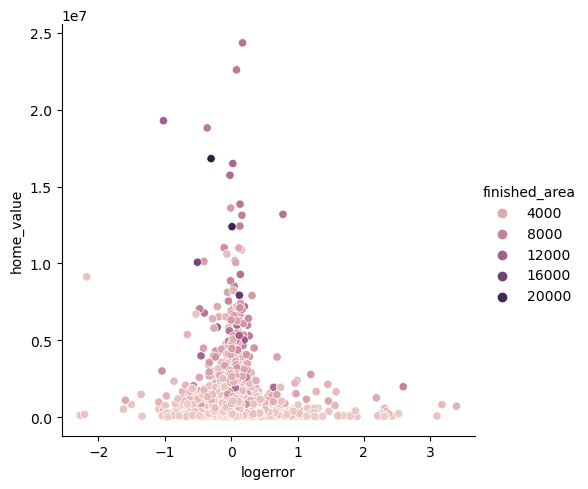

In [58]:
sns.relplot(data=la_df, x='logerror', y='home_value', hue='finished_area')

<Axes: xlabel='logerror', ylabel='finished_area'>

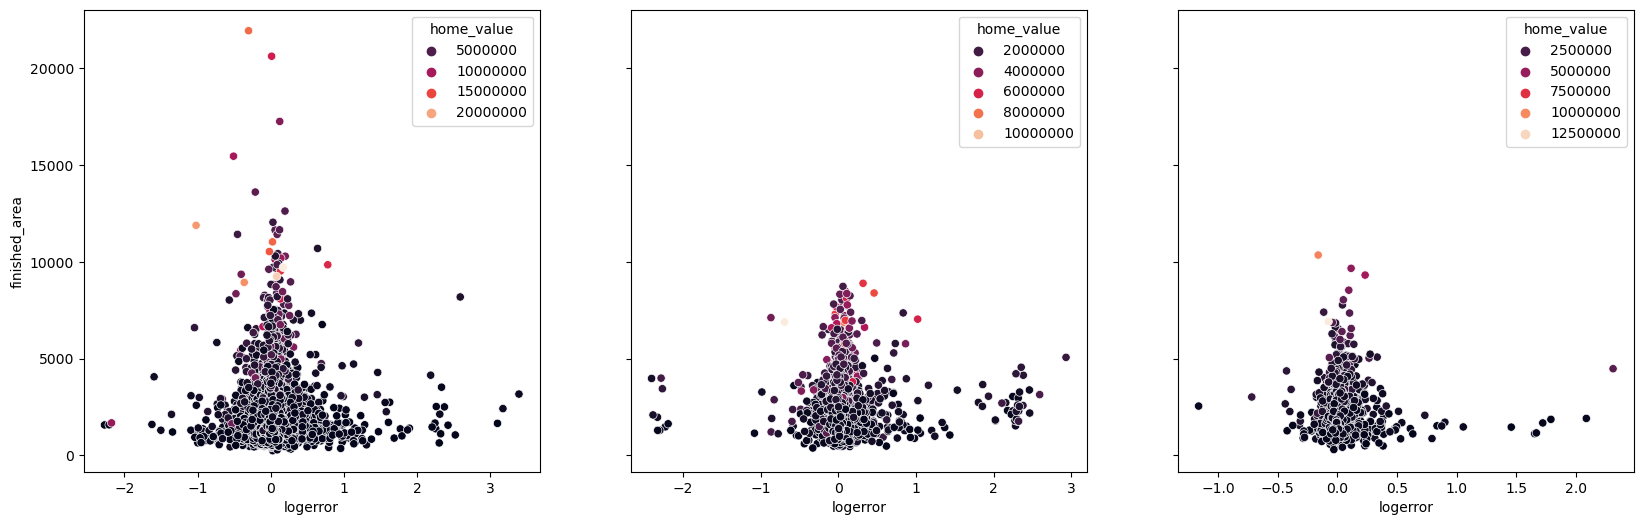

In [68]:
fig, ax = plt.subplots(1, 3, figsize=(20,6), sharey=True)

sns.scatterplot(data=la_df, x='logerror', y='finished_area', hue='home_value' ,palette='rocket', ax=ax[0])
sns.scatterplot(data=orange_df,x='logerror', y='finished_area', hue='home_value', palette='rocket', ax=ax[1])
sns.scatterplot(data=ventura_df,x='logerror', y='finished_area', hue='home_value', palette='rocket', ax=ax[2])


<Axes: xlabel='logerror', ylabel='finished_area'>

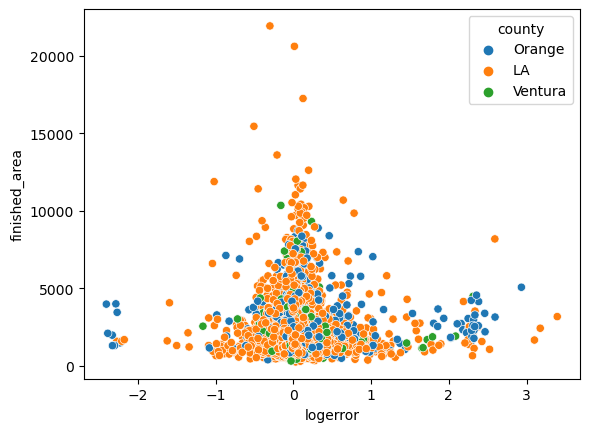

In [66]:
sns.scatterplot(data=train, x='logerror', y='finished_area', hue='county')

## Is there a significant difference in logerror between counties?


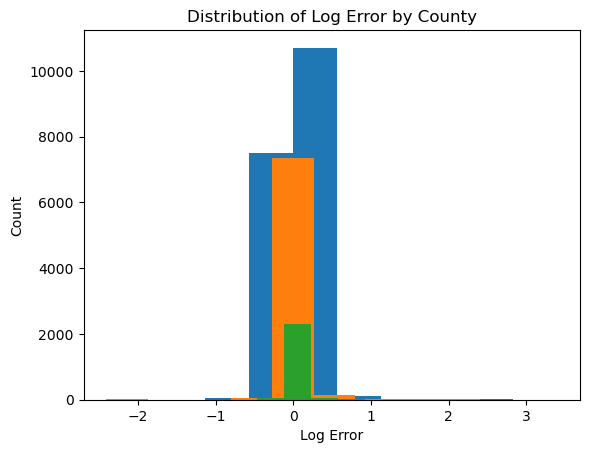

In [89]:
la_df.logerror.hist()
orange_df.logerror.hist()
ventura_df.logerror.hist()
plt.xlabel('Log Error')
plt.ylabel('Count')
plt.title('Distribution of Log Error by County')
plt.grid(None)

## Appear to be normal dist for all three

In [81]:
la_df.logerror.mean()

0.015155175659570195

In [82]:
orange_df.logerror.mean()

0.02494087168924724

In [83]:
ventura_df.logerror.mean()

0.020446228451889252

In [74]:
la_df.logerror.var()

0.02664527754807819

In [75]:
orange_df.logerror.var()

0.03958662209273295

In [76]:
ventura_df.logerror.var()

0.01867827176669197

## Appear to be about the same variance

H0: the means for the logerror in counties are equal

Ha: the mean for the logerror in counties are Not equal

In [78]:
alpha = .05

In [79]:
f, p = stats.f_oneway(la_df.logerror, orange_df.logerror, ventura_df.logerror)
f, p

(8.99209753420117, 0.00012474239099133846)

In [80]:
if p < alpha:
    print("We reject the null hypothesis")
else:
    print("We fail to reject the null hypothesis")


We reject the null hypothesis


### So the means for logerror in counties are not equal

## What is the logerror by Zipcode?

In [91]:
# I want zip as an int
train.regionidzip = train.regionidzip.astype(int)

In [93]:
zip_log = train[['logerror', 'regionidzip']]

In [100]:
w.check_columns(zip_log)

,Column Name,Number of Unique Values,Unique Values,Number of Null Values,Proportion of Null Values,dtype
1,regionidzip,375,"[97051, 96019, 96123, 96237, 96993, 96961, 961...",0,0.0,int64
0,logerror,28397,"[-0.0273119258941, 0.0262403339036, 0.02603037...",0,0.0,float64
